In [ ]:
from __future__ import print_function
import numpy as np
import math
from math import ceil
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt  # library for plotting math functions
import pandas as pd
import keras   # Import keras framework with various functions, models and structures
from keras.datasets import mnist # gets MNIST dataset from repository
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from keras.datasets import mnist
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras import regularizers
import cv2
import matplotlib.pyplot as plt


In [ ]:
lying_path='/content/drive/MyDrive/preplying'
standing_path = '/content/drive/MyDrive/prepstanding'

In [ ]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
    return np.asarray(images)


In [ ]:
lying_images = load_images_from_folder(lying_path)
standing_images = load_images_from_folder(standing_path)

In [ ]:
def normalize_images(image_array):
    normalized_images = []
    for image in image_array:
        normalized_image = image / 255.0
        normalized_images.append(normalized_image)

    return np.array(normalized_images)

In [ ]:
lying_images = normalize_images(lying_images)
standing_images = normalize_images(standing_images)

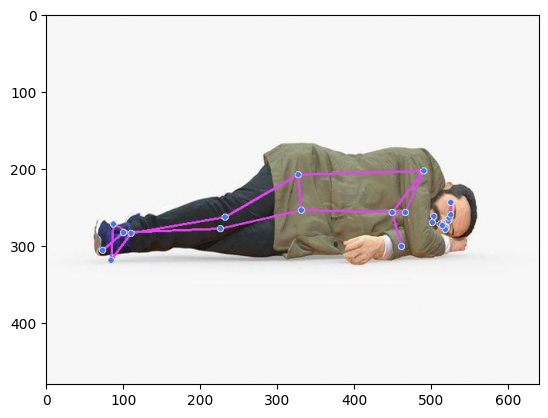

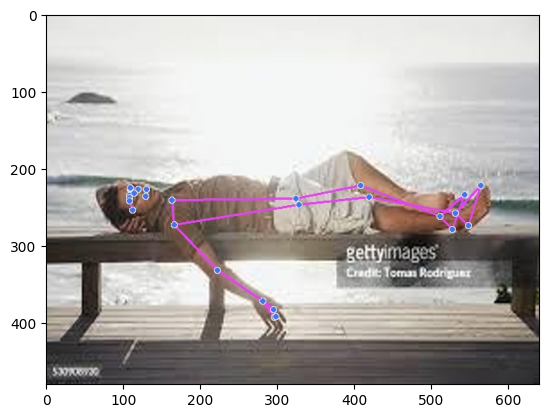

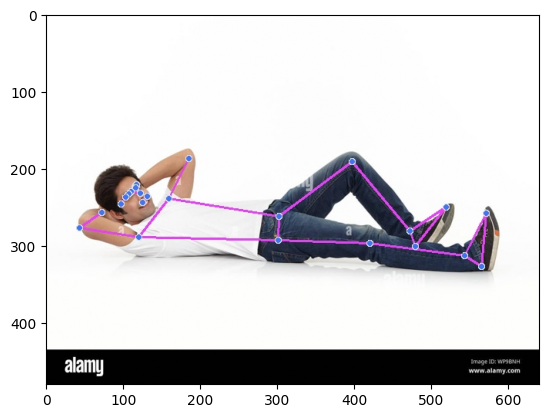

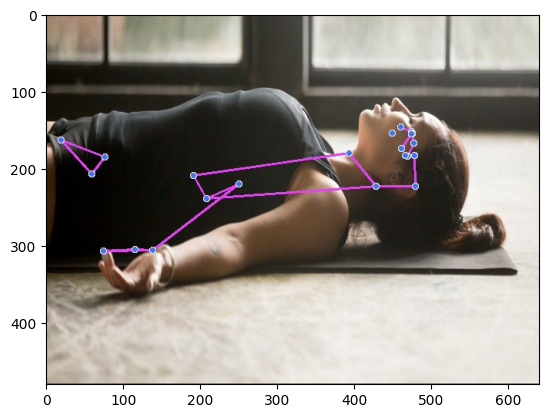

In [ ]:
for i in range(4):
  plt.imshow(lying_images[i])
  plt.show()

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

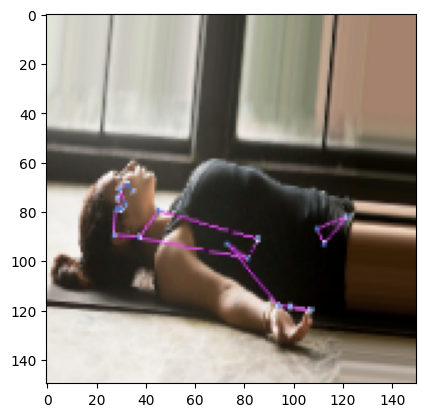

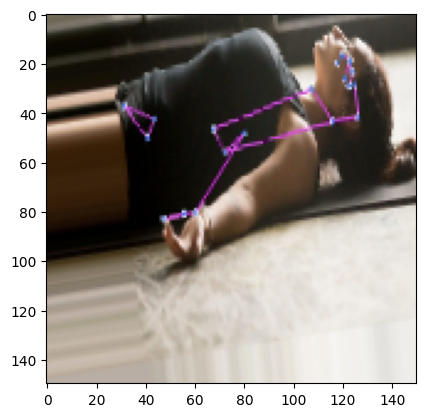

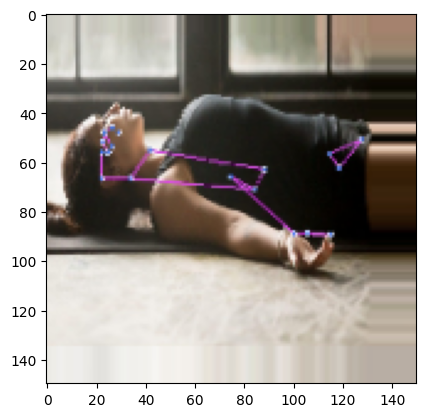

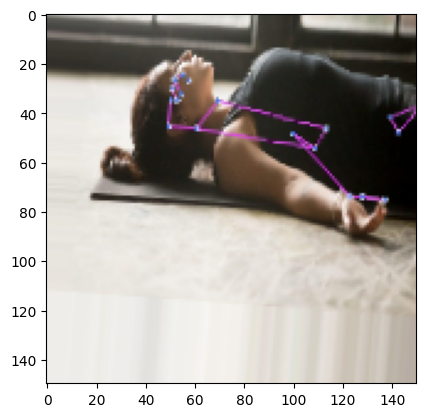

In [ ]:
from tensorflow.keras.preprocessing import image

img_rows = 150
img_cols = 150

fnames = [os.path.join(lying_path, fname) for fname in os.listdir(lying_path)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_rows, img_cols))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
l_labels = np.zeros(len(lying_images))
s_labels = np.ones(len(standing_images))

In [ ]:
l_labels = to_categorical(l_labels, num_classes=2)
s_labels =to_categorical(s_labels, num_classes=2)

In [ ]:
x_train.shape

(105, 480, 640, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x = np.concatenate((lying_images, standing_images))
y = np.concatenate((l_labels,s_labels))

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', input_shape=(480,640,3)))

model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.20))
model2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128,(3, 3), activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))
model2.add(Conv2D(128,(3, 3), activation='relu',padding='same'))


model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))
model2.add(Conv2D(256,(3, 3), activation='relu',padding='same'))


model2.add(Dropout(0.20))
model2.add(Conv2D(256,(3, 3), activation='relu',padding='same'))

model2.add(Dropout(0.20))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(2, activation='softmax'))




In [ ]:
batch_size=12
epochs=50
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)


model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['acc'])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
         factor=0.5,
         patience=5,
         verbose=1,
         min_lr=0.001)

datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

datagen.fit(x_train)

history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                            epochs=epochs,
                            steps_per_epoch=x_train.shape[0]//batch_size,
                            validation_data=(x_val, y_val),
                            verbose=1,
                            callbacks=[learning_rate_reduction])

Epoch 1/50
8/8 [==============================] - 11s 962ms/step - loss: 1.4535 - acc: 0.6667 - val_loss: 0.6470 - val_acc: 0.6842 - lr: 0.0010
Epoch 2/50
8/8 [==============================] - 6s 778ms/step - loss: 0.6342 - acc: 0.7204 - val_loss: 0.6632 - val_acc: 0.6842 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - 8s 968ms/step - loss: 0.6076 - acc: 0.7527 - val_loss: 0.6468 - val_acc: 0.6842 - lr: 0.0010
Epoch 4/50
8/8 [==============================] - 7s 907ms/step - loss: 0.6140 - acc: 0.7097 - val_loss: 0.6411 - val_acc: 0.6842 - lr: 0.0010
Epoch 5/50
8/8 [==============================] - 6s 751ms/step - loss: 0.5904 - acc: 0.7312 - val_loss: 0.6327 - val_acc: 0.6842 - lr: 0.0010
Epoch 6/50
8/8 [==============================] - 8s 957ms/step - loss: 0.5612 - acc: 0.7419 - val_loss: 0.6393 - val_acc: 0.6842 - lr: 0.0010
Epoch 7/50
8/8 [==============================] - 7s 856ms/step - loss: 0.5623 - acc: 0.7312 - val_loss: 0.6351 - val_acc: 0.6842 - lr: 0.001

In [ ]:
model2.save("/content/drive/MyDrive/stand_lie.h5")